In [ ]:
import sympy
from sympy import Eq, S, latex, plot_implicit, Matrix, Symbol, symbols
from sympy import simplify, expand, collect, solve, solveset, zeros, ones
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from sympy.plotting.plot import plot3d
import matplotlib.pyplot as plt
from IPython.display import Latex

# Практическое занятие 16
# Компьютерный практикум по алгебре на Python
## Поверхности второго порядка
### Задание 1.
Составить в матричном виде двумя способами уравнение поверхности второго порядка $4x^2-24xy+8\sqrt3 xz-7y^2+10\sqrt3 yz+3z^2-4 = 0$. Привести уравнение поверхности второго порядка к каноническому виду с помощью перехода к новому базису. Вывести на экран каноническое уравнение.

In [ ]:
# Первый способ, матрица третьего порядка.
from sympy.abc import x, y, z
A1 = Matrix(((4, -12, 4 * sympy.sqrt(3)),
            (-12, -7, 5 * sympy.sqrt(3)),
            (4 * sympy.sqrt(3), 5 * sympy.sqrt(3), 3)))

b1 = Matrix((0, 0, 0)).T

c1 = -4
X = Matrix((x, y, z))
u1 = simplify(X.T * A1 * X)
v1 = b1 * X
display(Latex(f'A = {latex(A1)},\\\\X^TAX = {latex(u1)},\\\\bX = {latex(v1)}'))
expr1 = (u1[0] + 2 * v1[0] + c1).expand().simplify()
display(Latex(f'Уравнение\ поверхности:\ {latex(Eq(expr1, 0))}'))

P = Matrix([])
for item in A1.eigenvects():
    multiplicity = item[1]
    for i in range(multiplicity):
        P = P.row_join(item[2][i].normalized()) 

A11 = P.T * A1 * P
x1, y1, z1 = symbols('x1 y1 z1')
X_new = Matrix((x1, y1, z1))
q_f1 = (X_new.T * A11 * X_new)[0].expand().simplify()
display(Latex(f'A_{{new}} = {latex(A11)}\\\\квадратичная\ форма:\ {latex(q_f1)}'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
# Второй способ, матрица четвертого порядка.
A1_new = A1.row_join(b1.T).col_join(b1.row_join(Matrix((c1,)))) # (c1,) - tuple, состоящий из одного элемента
display(Latex(f'A_{{new}} = {latex(A1_new)}'))
X1 = X.col_join(Matrix((1,)))
expr2 = (X1.T * A1_new * X1)[0].expand().simplify()
display(Latex(f'Уравнение\ поверхности:\ {latex(Eq(expr2, 0))}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Перенесем свободный член в правую часть и поделим обе части на свободный член с противоположным знаком.

In [ ]:
display(Eq(q_f1, 4))
eq1 = Eq(q_f1 / 4, 1)
display(eq1)

Eq(-20*x1**2 + 8*y1**2 + 12*z1**2, 4)

Eq(-5*x1**2 + 2*y1**2 + 3*z1**2, 1)

Получился Однополостной гиперболоид.

### Задание 2.
Привести уравнение поверхности второго порядка $24 x^{2} - 4 \sqrt{2} x y - 4 \sqrt{2} x z + 18 y^{2} + 12 y z + 18 z^{2} - 4 = 0$ к каноническому виду. Построить график.

In [ ]:
A2 = Matrix(((24, -2 * sympy.sqrt(2), -2 * sympy.sqrt(2)),
            (-2 * sympy.sqrt(2), 18, 6),
            (-2 * sympy.sqrt(2), 6, 18)))

b2 = Matrix((0, 0, 0)).T

c2 = -4
X = Matrix((x, y, z))
u2 = simplify(X.T * A2 * X)
v2 = b2 * X

P = Matrix([])
for item in A2.eigenvects():
    multiplicity = item[1]
    for i in range(multiplicity):
        P = P.row_join(item[2][i].normalized()) 

A2 = P.T * A2 * P
x2, y2, z2 = symbols('x2 y2 z2')
X_new = Matrix((x2, y2, z2))
q_f2 = (X_new.T * A2 * X_new)[0].expand().simplify()

display(Eq(q_f2, 4))
eq2 = Eq(q_f2 / 4, 1)
display(eq2)

Eq(12*x2**2 + 20*y2**2 + 28*z2**2, 4)

Eq(3*x2**2 + 5*y2**2 + 7*z2**2, 1)

<IPython.core.display.Latex object>

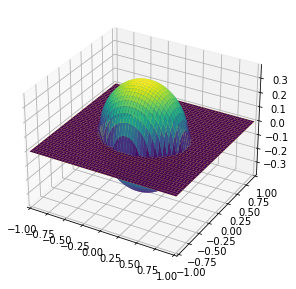

In [ ]:
Z = solve(eq2, z2) 
display(Latex('z_1 = {0}\\\\z_2 = {1}'.format(*map(latex, Z))))
plot3d(*Z, (x2, -1, 1), (y2, -1, 1))

### Задание 3.
Привести уравнение поверхности второго порядка $x^2 + y^2 + 2x - 4y + 2z + 1 = 0$ к каноническому виду. Построить график.

x**2 + y**2 + 2*z

<IPython.core.display.Latex object>

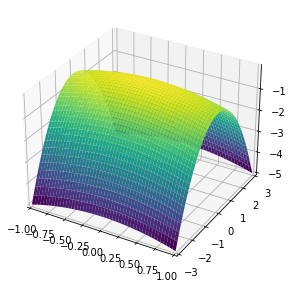

In [ ]:
u = x**2 + y**2 + 2*x - 4*y + 2*z + 1
u = u.subs(x, x - 1)
u = u.subs(y, y + 2)
u = u.subs(z, z + 2)
u = simplify(u)
display(u)

Z = solve(u, z) 
display(Latex('z = {0}'.format(*map(latex, Z))))
plot3d(*Z, (x, -1, 1), (y, -3, 3))




Получился Эллиптический параболоид. 
Чтобы поучить каноническое уравнение, достаточно провести замену переменной, избавляющую от свободного члена:

In [ ]:
# u = u.subs(z, z + 2)

### Индивидуальное задание.
Привести уравнение поверхности второго порядка к каноническому виду. Построить график.

Eq(-7*x1**2 + 3*y1**2 + 8*z1**2, -1)

<IPython.core.display.Latex object>

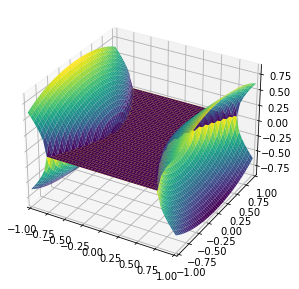

In [ ]:
#126
A1 = Matrix(((12, -2 * sympy.sqrt(3), 2 * sympy.sqrt(21)),
            (-2 * sympy.sqrt(3), 1, 3 * sympy.sqrt(7)),
            (2 * sympy.sqrt(21), 3 * sympy.sqrt(7), -5)))

b1 = Matrix((0, 0, 0)).T

c1 = 2
X = Matrix((x, y, z))
u1 = simplify(X.T * A1 * X)
v1 = b1 * X

P = Matrix([])
for item in A1.eigenvects():
    multiplicity = item[1]
    for i in range(multiplicity):
        P = P.row_join(item[2][i].normalized()) 

A11 = P.T * A1 * P
x1, y1, z1 = symbols('x1 y1 z1')
X_new = Matrix((x1, y1, z1))
q_f1 = (X_new.T * A11 * X_new)[0].expand().simplify()

eq1 = Eq(q_f1 / (2), -1)
display(eq1)


Z = solve(eq1, z1) 
display(Latex('z_1 = {0}\\\\z_2 = {1}'.format(*map(latex, Z))))
plot3d(*Z, (x1, -1, 1), (y1, -1, 1))


Получился Двуполостной гиперболоид.